In [ ]:
#Import all necessary libraries to perform Descriptive and inferntial statsics using Jupyter-Python version

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm

In [9]:
# Load Excel file
file_path = "/Users/akbarbasha/Desktop/statstics/sample_descriptive_data.xlsx"  # Or provide full path if not in same folder
df = pd.read_excel(file_path)

# Preview the first few rows
df.head()

,ID,Age,Income,Satisfaction_Score,Gender,Region,Purchases_Last_Year
0,1,56,59544.58,10,Male,North,4
1,2,46,36399.19,9,Male,North,1
2,3,32,57140.64,4,Male,South,4
3,4,60,69554.92,1,Female,South,7
4,5,25,53173.81,2,Female,North,6


In [11]:
df #Display the whole table #

,ID,Age,Income,Satisfaction_Score,Gender,Region,Purchases_Last_Year
0,1,56,59544.58,10,Male,North,4
1,2,46,36399.19,9,Male,North,1
2,3,32,57140.64,4,Male,South,4
3,4,60,69554.92,1,Female,South,7
4,5,25,53173.81,2,Female,North,6
...,...,...,...,...,...,...,...
95,96,24,63099.75,10,Female,East,6
96,97,26,53084.75,2,Male,North,2
97,98,41,28347.75,10,Male,West,5
98,99,18,34584.34,1,Male,East,2


In [14]:
df.describe() #summary stats for numerical columns #

,ID,Age,Income,Satisfaction_Score,Purchases_Last_Year
count,100.000000,100.00000,100.000000,100.000000,100.000000
mean,50.500000,40.88000,51027.643500,4.830000,4.870000
std,29.011492,13.99082,14965.841917,2.835757,2.043245
min,1.000000,18.00000,20901.330000,1.000000,1.000000
25%,25.750000,30.50000,38517.790000,2.750000,3.000000
50%,50.500000,41.00000,49870.225000,4.500000,5.000000
75%,75.250000,53.25000,61300.230000,7.250000,6.000000
max,100.000000,64.00000,94154.950000,10.000000,10.000000


In [18]:
df.shape #Provide the shape of no of rows and columns #

(100, 7)

In [20]:
df.describe(include='object') #summary stats for textual/categorical columns #

,Gender,Region
count,100,100
unique,2,4
top,Female,North
freq,55,29


In [25]:
q1 = df["Income"].quantile(0.25) #Findings Quartiles and inter quartile ranges #
q2 = df["Income"].quantile(0.50)
q3 = df["Income"].quantile(0.75)
iqr = q3 - q1
print(q1)
print(q2)
print(q3)
print(iqr) #Calculate Inter Quartile range to find the data outliers # 25 percent earn = to less than 38, 50 less than 45, 75 percent
#earn less than 61k and rest of the 25 percent earns more than 61k

38517.79
49870.225
61300.229999999996
22782.439999999995


In [43]:
# Skewness Calculate # Less than -1 (Highly skewed), Normal distribtuion mean=median same bell curve,, Greater than 1(Highly skewed)
skewness = df["Income"].skew()
print(skewness)

0.3938076747273895


Text(0.5, 1.0, 'Histogram of Income\nSkewness,0.3938076747273895')

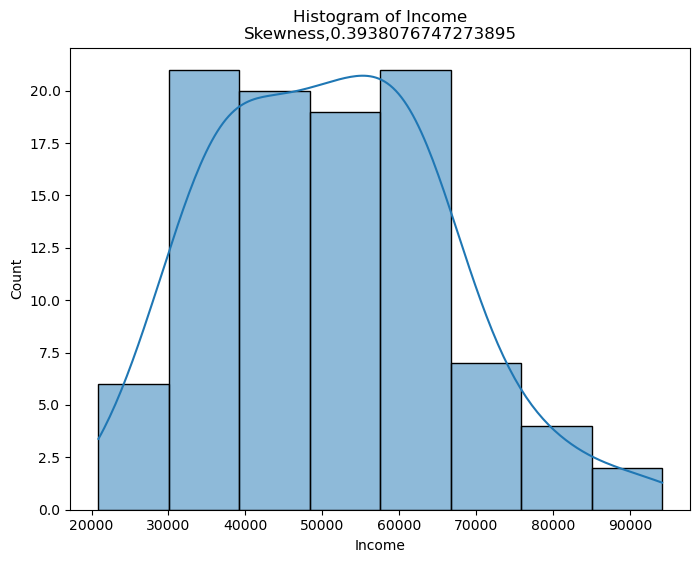

In [93]:
#Basic plot without ND curve#
fig, ax = plt.subplots(figsize=(8, 6)) #ax refres to the Axes objext in matplot library#
sns.histplot(df["Income"], kde=True, ax=ax) #ax=ax#
ax.set_title(f'Histogram of Income\nSkewness,{skewness}')

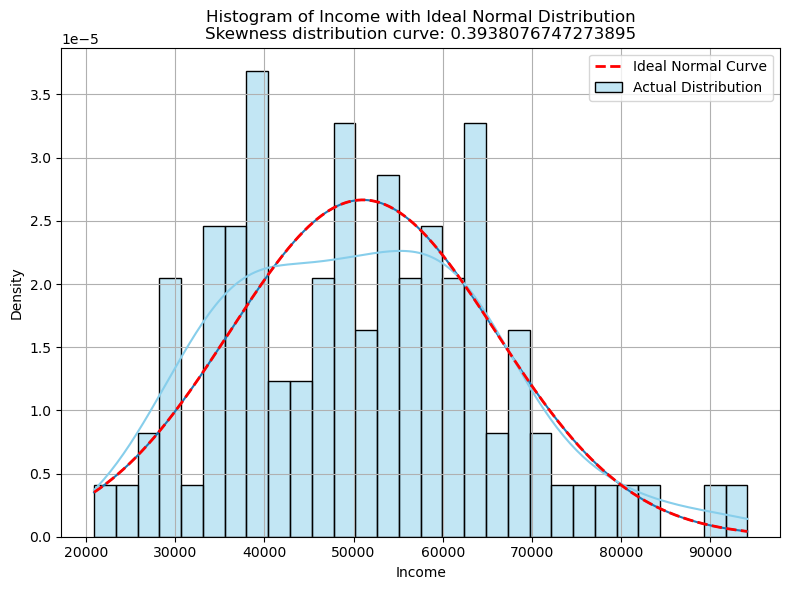

In [144]:
fig, ax = plt.subplots(figsize=(8, 6)) #sets up figure and axes #

# Firstly, we will Generate normal distribution curve values.The code would remain standard across all the measures against Normal.Dist curve #

x = np.linspace(df["Income"].min(), df["Income"].max(), 1000) #Creating even nos ranges to draw a ND-bell curve#
normal_dist = norm.pdf(x, mean, std) #.pdf stands for Probability Density Function#
ax.plot(x, normal_dist) #we plot only x and normal_distribution of the given data#

# KDE screwness curve - Sample CSV data right skewness curve of the given data #

sns.histplot(df["Income"], bins=30, kde=True, stat="density", color='skyblue', edgecolor='black', ax=ax, label='Actual Distribution')

#Plotting the normal distribtuion curve with all the values deifned in the code above for normal distribtuion #
ax.plot(x, normal_dist, color='red', linestyle='--', linewidth=2, label='Ideal Normal Curve')

#Plots need summarizing of the variables # Also we can use axes object(ax variable name)
# Final formatting #
ax.set_title(f"Histogram of Income with Ideal Normal Distribution\nSkewness distribution curve: {skewness}")
ax.set_xlabel("Income")
ax.set_ylabel("Density")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

OR
#-------------------
#plt.plot(x, y)
#plt.title("Normal Distribution")
#plt.xlabel("Value")
#plt.ylabel("Density")
#plt.grid(True)
#plt.show()
--------------------

In [ ]:
'''
Normal distribtuion curve syntax in jupyter notebook
--------------------------------------------------------------
x = np.linspace(df["Income"].min(), df["Income"].max(), 1000)
normal_dist = norm.pdf(x, mean, std)
--------------------------------------------------------------

🔍 What it does:
	•	np.linspace(start, stop, num) = creates an array of evenly spaced numbers.
	•	df["Income"].min() = lowest income in your dataset
	•	df["Income"].max() = highest income in your dataset
	•	1000 = generate 1000 points between min and max

✅ Purpose:

You are creating 1000 evenly spaced income values from the min to the max — this becomes your X-axis for plotting the bell curve.

normal_dist = norm.pdf(x, mean, std)?

🔍 What it does:
	•	norm.pdf(x, mean, std) calculates the probability density function (PDF) of a normal distribution
	•	x = the 1000 values you created
	•	mean and std = from your actual income data
✅ Purpose:

This creates Y-values (heights) of a bell curve based on your dataset’s mean and standard deviation, to plot the ideal normal distribution.


In [55]:
# Kurtosis Calculate # Less than -3 (Highly skewed), Normal distribtuion mean=median same bell curve , 
#Greater than 3 (Highly skewed)
kurtosis = df["Income"].kurt()
print(kurtosis)

-0.09659686181617877


In [ ]:
#Visualization of Descriptive Analytics # Histogram Plots # using sns python library

In [ ]:
'''
KDE (Kernel Density Estimation) is a way to visualize the distribution of your data smoothly, rather than in discrete bars like a histogram. When you set kde=True, it overlays a smooth density curve on your histogram, helping you see the overall shape more clearly.
Why Use KDE?
Smooths the histogram: Instead of rigid bars, it estimates the probability density function (PDF) of your data.
Helps identify trends: Useful when your data has multiple peaks or subtle patterns.
Works well for large datasets: It can highlight distributions more effectively.
'''

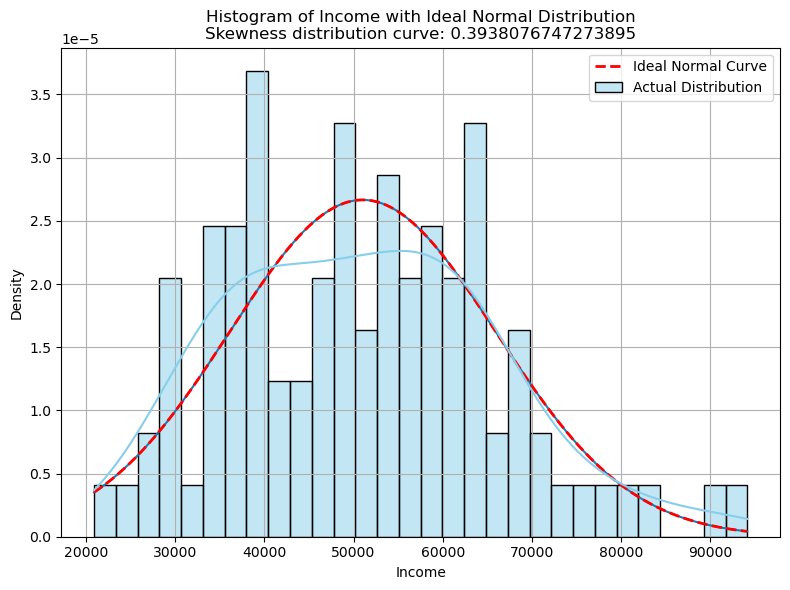

In [166]:
fig, ax = plt.subplots(figsize=(8, 6))

#Actual syntax code for ND curve #

x = np.linspace(df["Income"].min(), df["Income"].max(), 1000)
normal_dist = norm.pdf(x, mean, std)
ax.plot(x, normal_dist)

#Pictorial representation of graph values#
ax.plot(x, normal_dist, color='red', linestyle='--', linewidth=2, label='Ideal Normal Curve')

# Actual Income distribtuion based on the sample data#
sns.histplot(df["Income"], bins=30, kde=True, stat="density", color='skyblue', edgecolor='black', ax=ax, label='Actual Distribution')

ax.set_title(f"Histogram of Income with Ideal Normal Distribution\nSkewness distribution curve: {skewness}")
ax.set_xlabel("Income")
ax.set_ylabel("Density")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

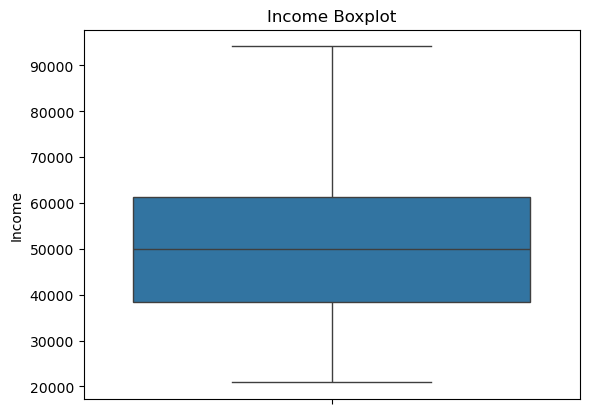

In [65]:
# we use sns python library with boxplot module to generate boxplot graph for numerical columns#
# Boxplot
sns.boxplot(df["Income"])
plt.title("Income Boxplot")
plt.show()

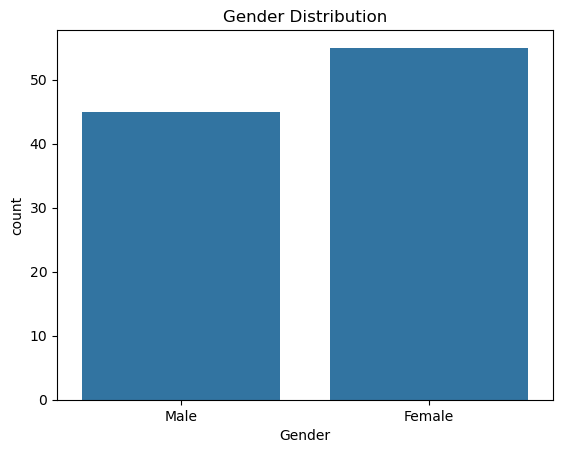

In [67]:
# Countplot module for categorical /textual columns using seaborn library #
sns.countplot(data=df, x="Gender")
plt.title("Gender Distribution")
plt.show()

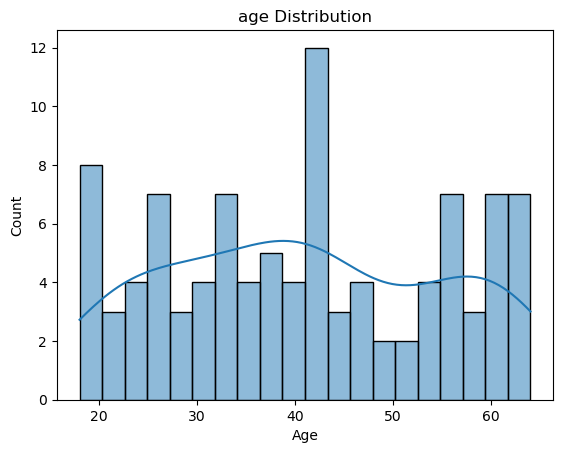

In [81]:
sns.histplot(df["Age"], bins=20, kde=True) #Data is evenly distributed hence flat curve.There is no distortion#
plt.title("age Distribution")
plt.show()

In [83]:
skewness = df["Age"].skew()
print(skewness)

0.07916633144467033


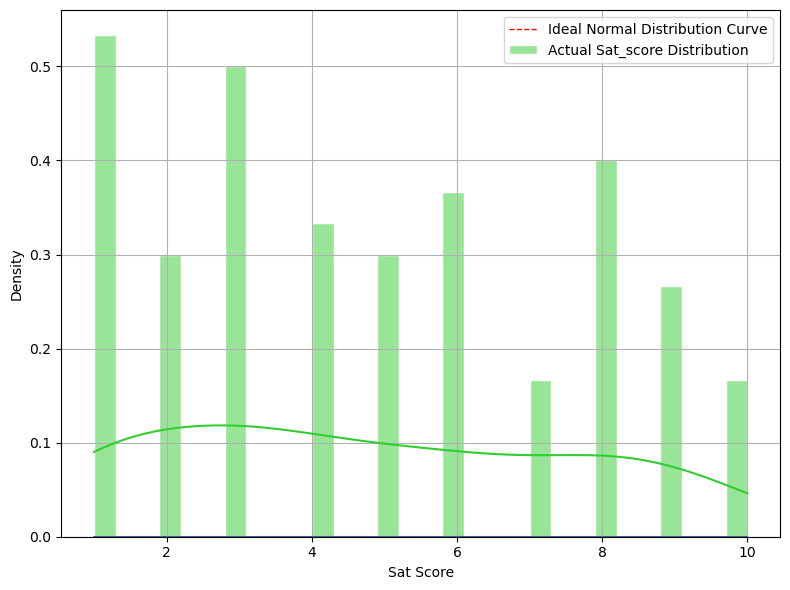

In [200]:
fig, ax = plt.subplots(figsize=(8, 6))
x = np.linspace(df["Satisfaction_Score"].min(), df["Satisfaction_Score"].max(), 1000)
normal_dist = norm.pdf(x, mean, std)
ax.plot(x, normal_dist)

#Pictorial representation of graph values#
ax.plot(x, normal_dist, color='red', linestyle='--', linewidth=1, label='Ideal Normal Distribution Curve')

sns.histplot (df["Satisfaction_Score"], bins=30, kde=True, stat="density", color='limegreen', edgecolor='white', ax=ax, label='Actual Sat_score Distribution')

ax.set_title
ax.set_xlabel("Sat Score")
ax.set_ylabel("Density")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

In [93]:
skewness = df["Satisfaction_Score"].skew() #less than -1 and greater than 1 is highly screwed with confodence level#
print(skewness)

0.23571779949262445


In [95]:
kurtosis = df["Satisfaction_Score"].kurt() #less than 3 and greater than 3 means highly screwed with confidence levels#
print(kurtosis)

-1.1799554405968917


In [178]:
df

,ID,Age,Income,Satisfaction_Score,Gender,Region,Purchases_Last_Year
0,1,56,59544.58,10,Male,North,4
1,2,46,36399.19,9,Male,North,1
2,3,32,57140.64,4,Male,South,4
3,4,60,69554.92,1,Female,South,7
4,5,25,53173.81,2,Female,North,6
...,...,...,...,...,...,...,...
95,96,24,63099.75,10,Female,East,6
96,97,26,53084.75,2,Male,North,2
97,98,41,28347.75,10,Male,West,5
98,99,18,34584.34,1,Male,East,2


In [180]:
df.columns

Index(['ID', 'Age', 'Income', 'Satisfaction_Score', 'Gender', 'Region',
       'Purchases_Last_Year'],
      dtype='object')

In [186]:
df['Satisfaction_Score'].min

<bound method Series.min of 0     10
1      9
2      4
3      1
4      2
      ..
95    10
96     2
97    10
98     1
99     8
Name: Satisfaction_Score, Length: 100, dtype: int64>

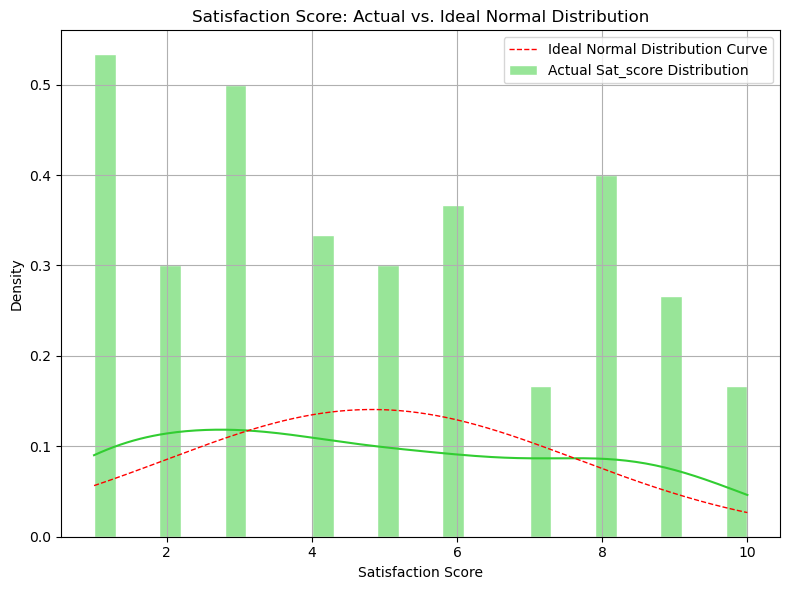

In [202]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Calculate mean and std from Satisfaction_Score
mean = df["Satisfaction_Score"].mean()
std = df["Satisfaction_Score"].std()

# Generate X values and corresponding bell curve
x = np.linspace(df["Satisfaction_Score"].min(), df["Satisfaction_Score"].max(), 1000)
normal_dist = norm.pdf(x, mean, std)

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot actual distribution (histogram + KDE)
sns.histplot(df["Satisfaction_Score"], bins=30, kde=True, stat="density",
             color='limegreen', edgecolor='white', ax=ax, label='Actual Sat_score Distribution')

# Plot ideal normal distribution curve
ax.plot(x, normal_dist, color='red', linestyle='--', linewidth=1, label='Ideal Normal Distribution Curve')

# Add title and labels
ax.set_title("Satisfaction Score: Actual vs. Ideal Normal Distribution")
ax.set_xlabel("Satisfaction Score")
ax.set_ylabel("Density")
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()